# 1. IMPORT LIBRARIES AND DATASETS (Import thư viện và bộ dữ liệu)

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
reviews = pd.read_csv('amazon_alexa.tsv', sep ='\t')

In [143]:
reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [144]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [145]:
reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [146]:
reviews['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# 2. EXPLORE DATASET (Tìm hiểu và khai phá bộ dữ liệu)

In [147]:
# Hiển thị số lượng dữ liệu Null trong các cột
reviews.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [148]:
# Vì cột verified_reviews đang có giá trị Null nên ta sẽ loại bỏ giá trị Null trong cột verified_reviews bằng câu lệnh sau
reviews = reviews.dropna(subset=['verified_reviews'])

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

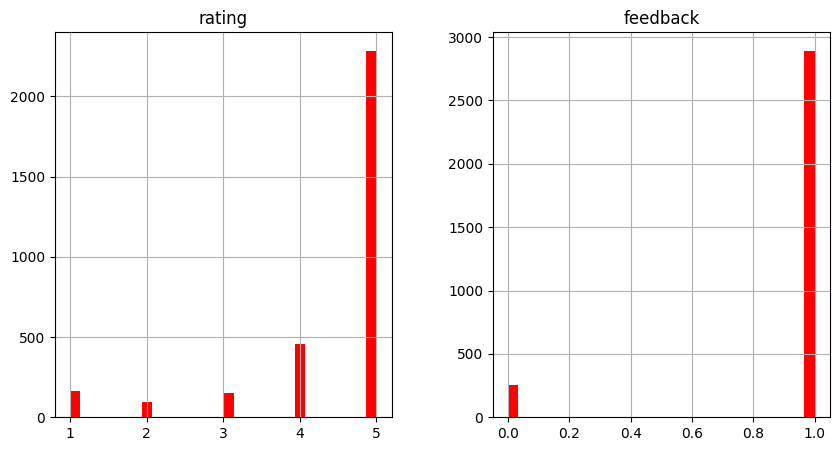

In [149]:
# Hàm này được sử dụng để vẽ biểu đồ histogram cho các cột kiểu số (int, float) trong DataFrame
# biểu đồ có chiều rộng là 10 inch và chiều cao là 5 inch
# biểu đồ histogram sẽ cho thấy tần suất xuất hiện của mỗi giá trị trong cột.
reviews.hist(bins = 30, figsize = (10,5), color = 'r')

In [150]:
# Sau khi chạy lệnh, DataFrame reviews sẽ có thêm một cột length, chứa số lượng ký tự trong mỗi chuỗi của cột verified_reviews
reviews['length'] = reviews['verified_reviews'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_20972\1526877029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['length'] = reviews['verified_reviews'].apply(len)


<Axes: xlabel='length', ylabel='Count'>

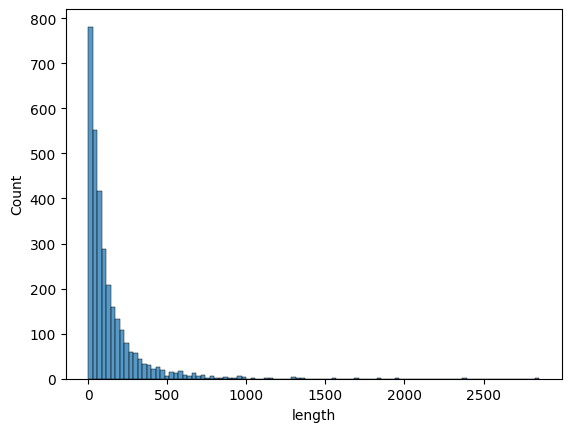

In [151]:
# vẽ biểu đồ số lượng các chữ cái trong từng reviews
sns.histplot(data = reviews, x = 'length', bins = 100)

In [152]:
reviews['length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [153]:
# Review with longest length
# Hiển thị review dài nhất
reviews[reviews['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [154]:
# Review with shortest length
# Hiển thị review ngắn nhất
reviews[reviews['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [155]:
# Review with mean length
# Hiển thị review độ dài trung bình 
reviews[reviews['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [156]:
# Câu lệnh này sẽ lọc và tạo ra một DataFrame con, chỉ chứa các hàng trong reviews có giá trị cột feedback bằng 1 (feedback tích cực)
positive = reviews[reviews['feedback'] == 1]
positive


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [157]:
# Câu lệnh này sẽ lọc và tạo ra một DataFrame con, chỉ chứa các hàng trong reviews có giá trị cột feedback bằng 0 (feedback tiêu cực)
negative = reviews[reviews['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


<Axes: xlabel='feedback', ylabel='count'>

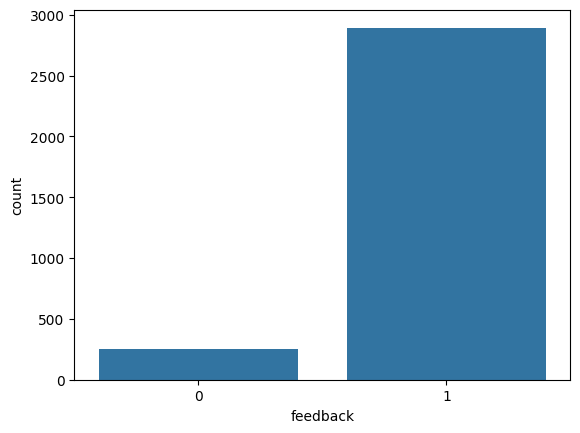

In [158]:
# Câu lệnh này sử dụng thư viện Seaborn (sns) 
# Để tạo biểu đồ countplot nhằm hiển thị số lượng các giá trị trong cột feedback của DataFrame reviews
sns.countplot(x = 'feedback', data = reviews)


<Axes: xlabel='rating', ylabel='count'>

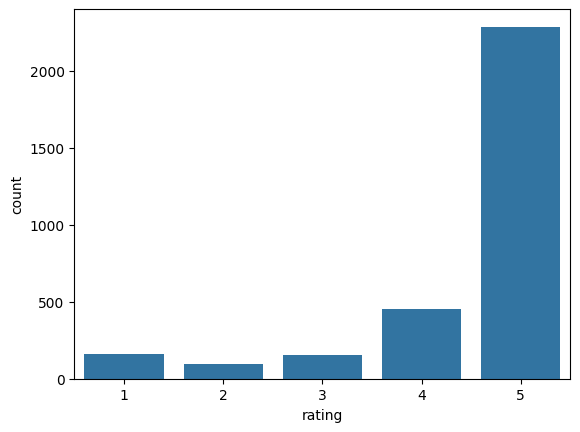

In [159]:
# tạo biểu đồ thể hiện các giá trị trong cột rating của dataframe reviews
sns.countplot(x = 'rating', data = reviews)


<Axes: >

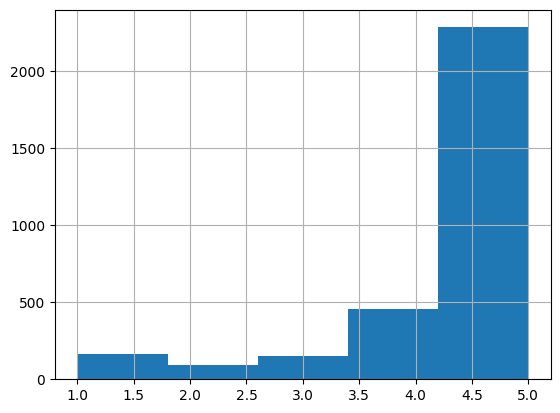

In [160]:
reviews['rating'].hist(bins = 5)

C:\Users\HP\AppData\Local\Temp\ipykernel_20972\3073896804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

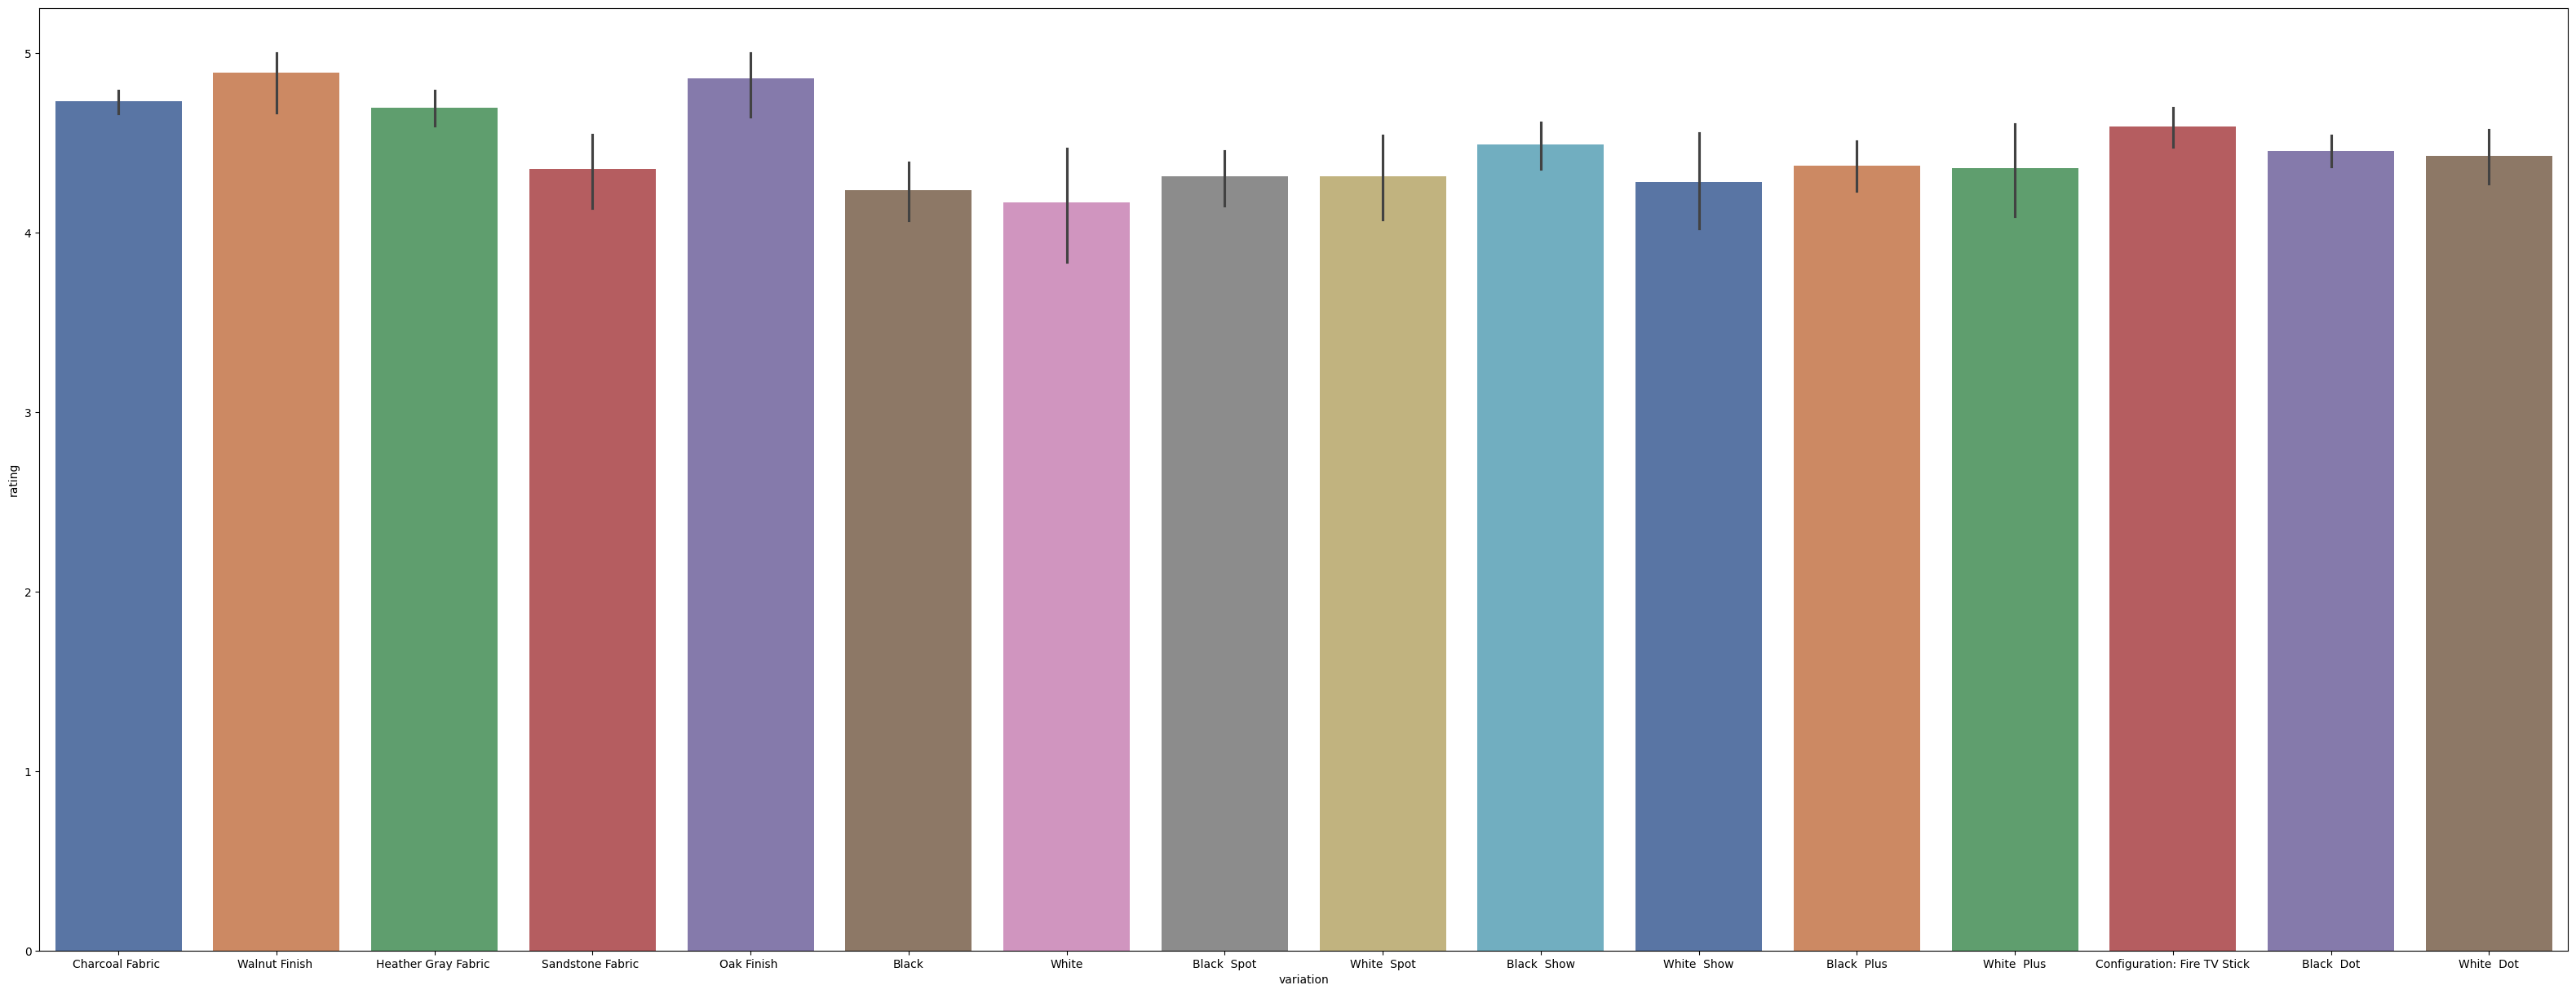

In [161]:
# Vẽ biểu đồ thể hiện giá trị của rating trung bình của từng variation (biến thể sản phẩm)
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


In [162]:
# Chuyển đổi cột verified_reviews thành một danh sách (list). Mỗi phần tử trong danh sách này là một chuỗi (string) tương ứng với một đánh giá.
sentences = reviews['verified_reviews'].tolist()
len(sentences)


3149

In [163]:
# hiển thị danh sách tất cả reviews
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [164]:
# Nối tất cả các chuỗi trong danh sách sentences thành một chuỗi duy nhất, với mỗi câu cách nhau một dấu cách " ". 
# Kết quả là một chuỗi dài chứa tất cả các đánh giá trong cột verified_reviews
sentences_as_one_string =" ".join(sentences)

In [165]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

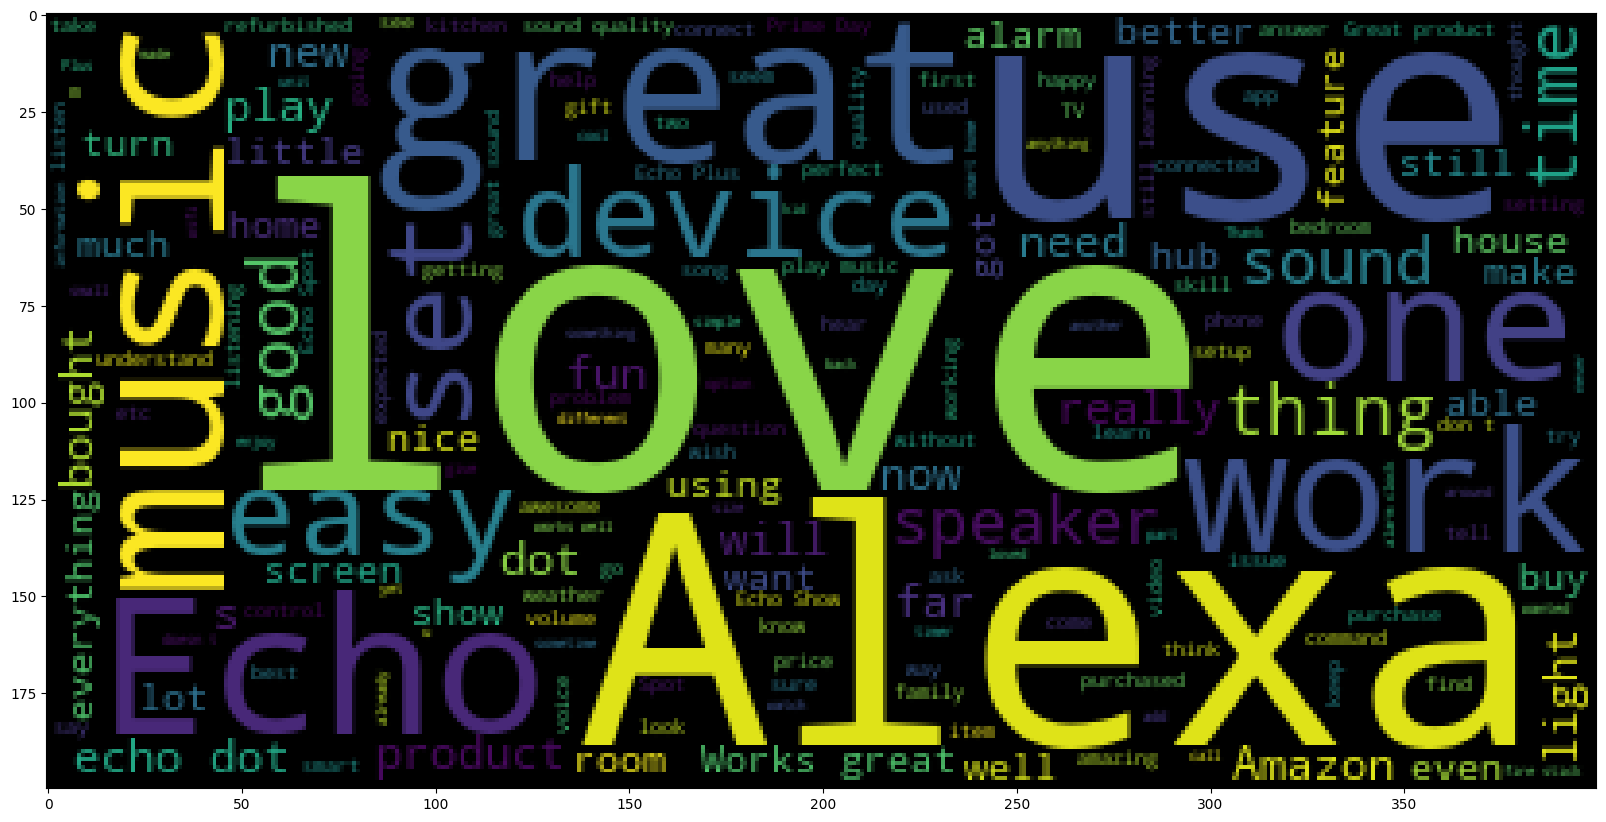

In [166]:
# Biểu đồ Word Cloud sẽ hiển thị tất cả các từ trong các đánh giá của cột verified_reviews, với các từ phổ biến hơn được hiển thị lớn hơn và rõ ràng hơn.
# Điều này giúp bạn trực quan hóa các từ khóa hay cụm từ mà người dùng sử dụng nhiều nhất trong đánh giá của họ.
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


In [167]:
# Chuyển đổi cột verified_reviews của danh sách các review tiêu cực thành một danh sách (list). 
# Mỗi phần tử trong danh sách này là một chuỗi (string) tương ứng với một đánh giá.
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [168]:
# Nối các danh review lại thành 1 câu
negative_sentences_as_one_string = " ".join(negative_list)

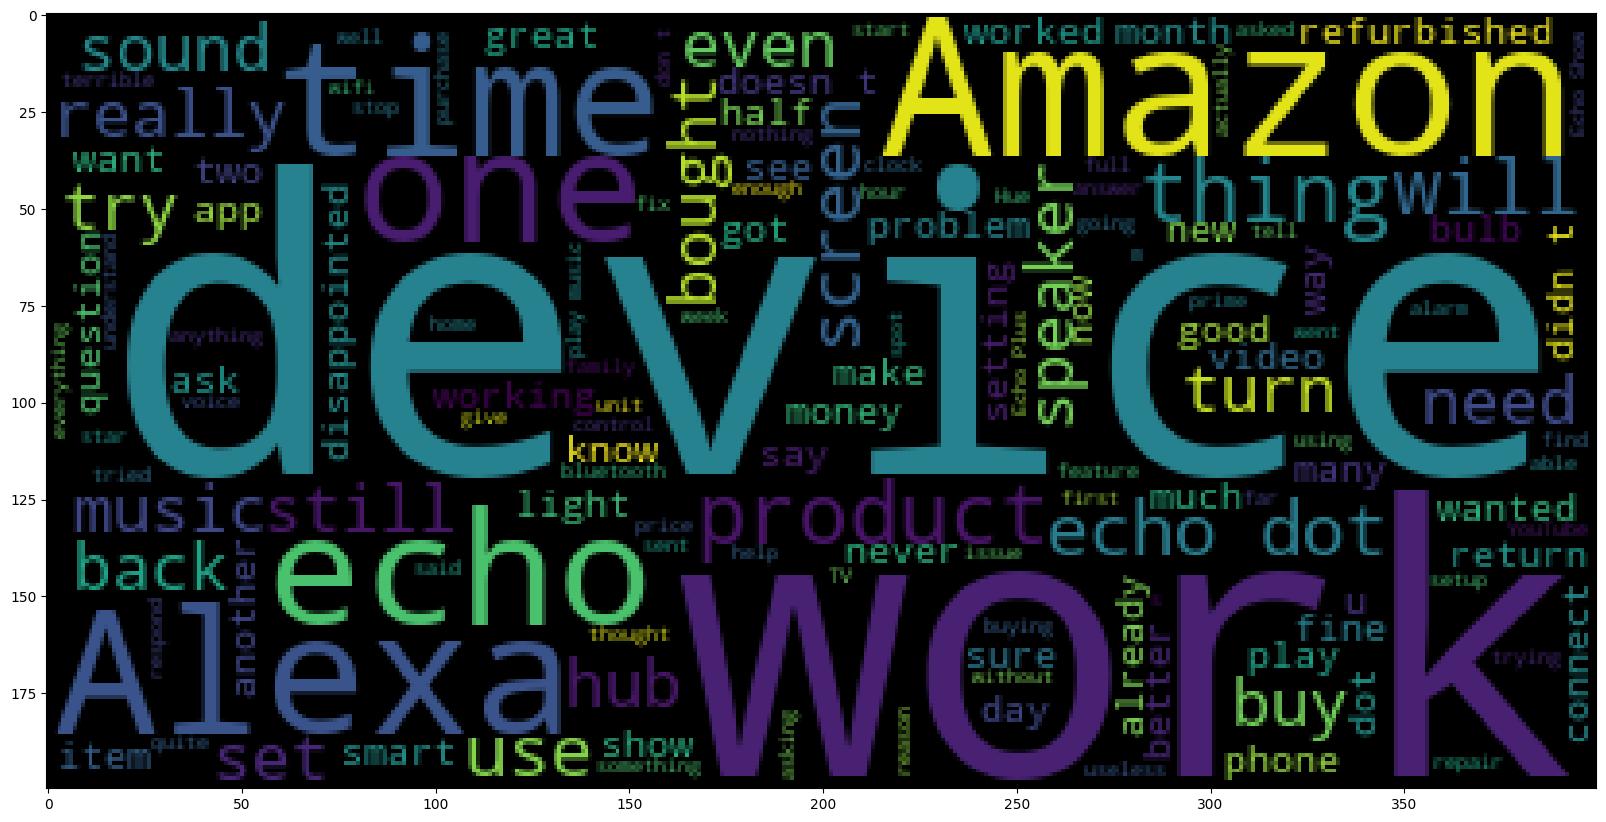

In [169]:
# Biểu đồ Word Cloud sẽ hiển thị tất cả các từ trong các đánh giá tiêu cực của cột verified_reviews, với các từ phổ biến hơn được hiển thị lớn hơn và rõ ràng hơn.
# Điều này giúp bạn trực quan hóa các từ khóa hay cụm từ mà người dùng sử dụng nhiều nhất trong đánh giá của họ.
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# 3. PERFORM DATA CLEANING (Biến đổi và làm sạch dữ liệu)

In [170]:
reviews

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [171]:
# Bỏ cột date, rating, length trong dataframe reviews
reviews = reviews.drop(['date', 'rating', 'length'], axis = 1)
origin_data = reviews.copy()

In [172]:
reviews

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [173]:
# Đây là một hàm của pandas dùng để chuyển đổi các biến variation thành dạng biến giả (dummy variables). 
# Mỗi giá trị phân loại trong cột variation sẽ được chuyển thành một cột mới
# với mỗi giá trị phân loại tương ứng sẽ có giá trị 0 (False) hoặc 1 (True).
variation_dummies = pd.get_dummies(reviews['variation'], drop_first=False)

In [174]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [175]:
# Bỏ cột variation trong dataframe reviews
reviews.drop(['variation'], axis = 1, inplace = True)

In [176]:
# nối dataframe variation_dummies vào dataframe reviews
reviews = pd.concat([reviews, variation_dummies], axis =1)

In [177]:
reviews

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# 4. PERFORM DATA CLEANING BY APPLYING PUNCTUATION REMOVAL, STOP WORDS REMOVAL, AND COUNT VECTORIZER
## Thực hiện làm sạch dữ liệu bằng các bước loại bỏ dấu câu, loại bỏ từ dừng, và áp dụng Count Vectorizer

In [178]:
# Trong đoạn mã này ta sẽ tạo hàm message_cleaning để làm sạch văn bản bằng cách thực hiện các bước sau:
# Loại bỏ dấu câu (punctuation removal).
import string
string.punctuation

# Loại bỏ từ dừng (stop words removal).
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
# Thực hiện việc làm sạch dữ liệu bằng cách gọi hàm message_cleaning
reviews_clean = reviews['verified_reviews'].apply(message_cleaning)

In [180]:
# Hiển thị dữ liệu sau khi làm sạch
reviews_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object

In [181]:
# Hiển thị dữ liệu review thứ 3 sau khi làm sạch
print(reviews_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [182]:
# Hiển thị dữ liệu review thứ 3 trước khi làm sạch
print(reviews['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [183]:
# Vector hóa văn bản trong cột reviews['verified_reviews'] bằng cách sử dụng CountVectorizer từ thư viện sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_cvr = vectorizer.fit_transform(reviews['verified_reviews'])

In [184]:
# Hiển thị danh sách các từ đã được làm sạch
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [185]:
# Xóa cột verified_reviews trong dataframe reviews
reviews.drop(['verified_reviews'], axis = 1)

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [186]:
# Chuyển đổi ma trận reviews_cvr thành một DataFrame của pandas để dễ dàng thao tác và phân tích
reviews_cvr = pd.DataFrame(reviews_cvr.toarray())

In [187]:
# kết hợp DataFrame reviews và DataFrame reviews_cvr thành một DataFrame duy nhất có cả thông tin văn bản gốc và dữ liệu đã được vector hóa
review_df = pd.concat([reviews.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)

In [188]:
review_df

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,Love my Echo!,1,False,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,False,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,Music,1,False,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,"Perfect for kids, adults and everyone in betwe...",1,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3145,"Listening to music, searching locations, check...",1,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,"I do love these things, i have them running my...",1,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [189]:
review_df.drop(['verified_reviews'], axis =1, inplace = True)

In [190]:
x = review_df.drop(['feedback'],axis =1)

In [191]:
x

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3145,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [192]:
y = reviews['feedback']

# 5. TRAIN A NAIVE BAYES CLASSIFIER MODEL (Huấn luyện mô hình phân loại bằng Naive Bayes)

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [194]:
from sklearn.naive_bayes import MultinomialNB

In [195]:
NB_classifier = MultinomialNB()
x_train.columns = x_train.columns.astype(str) ###########################################
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [196]:
from sklearn.metrics import classification_report, confusion_matrix

In [197]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([1, 1, 1, ..., 1, 1, 1], shape=(2519,))

<Axes: >

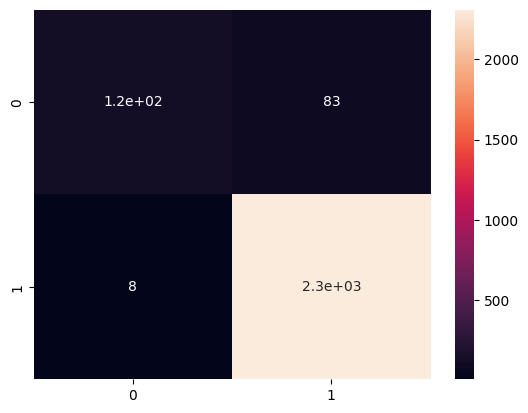

In [198]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

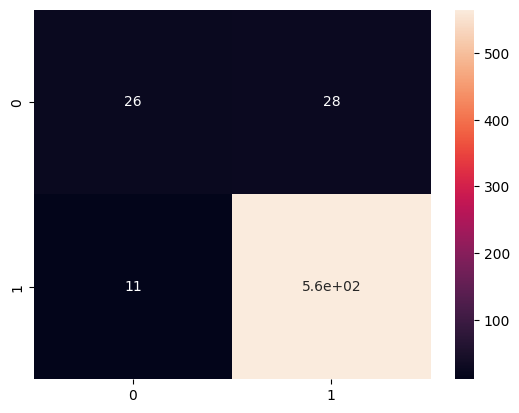

In [199]:
x_test.columns = x_test.columns.astype(str) ######################
y_predict_test = NB_classifier.predict(x_test)
y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [200]:
print(x_test)

      Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
418    True       False        False        False        False   
2717  False       False        False        False        False   
1215  False       False        False        False         True   
1198  False       False        False        False        False   
1411  False       False        False         True        False   
...     ...         ...          ...          ...          ...   
2832  False        True        False        False        False   
1957  False       False         True        False        False   
2435  False       False        False        False        False   
1854  False       False         True        False        False   
359   False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
418              False                         False                 False   
2717             False                         Fals

In [201]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        54
           1       0.95      0.98      0.97       576

    accuracy                           0.94       630
   macro avg       0.83      0.73      0.77       630
weighted avg       0.93      0.94      0.93       630



# 7. Dự đoán đánh giá (Feedback)

## Mô tả các bước:
### B1: Chuẩn bị bộ test (trong file test.xlsx - chưa có cột Feedback)
### B2: Xử lý dữ liệu, xóa các cột dư thừa, biến đổi cấu trúc
### B3: Sử dụng mô hình Naive Bayes để dự đoán
### B4: Ghi kết quả vào file test.xlsx (file sẽ xuất hiện cột Feebback)



In [202]:
# Hàm xử lý dữ liệu
def process_data(data, origin_data):
    data = data.drop(['date', 'rating'], axis = 1)
    origin_data = origin_data.drop(['feedback'], axis = 1)
    data = pd.concat([origin_data, data], axis=0)
    variation_dummies = pd.get_dummies(data['variation'], drop_first=False)
    data.drop(['variation'], axis = 1, inplace = True)
    data = pd.concat([data, variation_dummies], axis =1)

    # Vector hóa văn bản trong cột reviews['verified_reviews'] bằng cách sử dụng CountVectorizer từ thư viện sklearn
    vectorizer = CountVectorizer(analyzer = message_cleaning)
    reviews_cvr = vectorizer.fit_transform(data['verified_reviews'])
    # Xóa cột verified_reviews trong dataframe reviews
    data.drop(['verified_reviews'], axis = 1)
        
    # Chuyển đổi ma trận reviews_cvr thành một DataFrame của pandas để dễ dàng thao tác và phân tích
    reviews_cvr = pd.DataFrame(reviews_cvr.toarray())
    
    #  kết hợp DataFrame reviews và DataFrame reviews_cvr thành một DataFrame duy nhất có cả thông tin văn bản gốc và dữ liệu đã được vector hóa
    review_df = pd.concat([data.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)
    review_df.drop(['verified_reviews'], axis =1, inplace = True)
    return review_df

In [203]:
# Đọc file để lấy dữ liệu test
test_data = pd.read_excel('test.xlsx')
num_rows_test_data = len(test_data)


In [204]:
# Gọi hàm xử lý dữ liệu
test_data = process_data(test_data, origin_data)

In [205]:
test_data.columns = test_data.columns.astype(str) ######################
test_data_predict = NB_classifier.predict(test_data)

# test_data_predict
print(test_data_predict[-num_rows_test_data:])
result = test_data_predict[-num_rows_test_data:]

# Mapping 0 -> 'Negative' và 1 -> 'Positive'
result = np.where(result == 0, 'Negative', 'Positive')
result_df = pd.DataFrame(result, columns=['feedback'])

# Đọc file Excel hiện tại vào DataFrame
output_data = pd.read_excel('test.xlsx')

# Thêm cột 'feedback' vào DataFrame đã có
output_data['feedback'] = result_df['feedback']

# Ghi lại DataFrame vào file Excel, giữ nguyên các dữ liệu cũ
output_data.to_excel('test_result.xlsx', index=False)

[1 1 1 0 1 0 1 1 1 1 1 1 1]
